## 課題提出時（2018/12/23）の所感
LSTM/RNNのベースの知識があまり無い状態なので、まだまだ自分の言葉で説明できる域にまでは達していないです。引き続き地道に学習を続けていきたいです。  
オプションは対応しておりません。

## 1.この課題の目的
・広く手法全般を学ぶ経験をする  
・発展的なRNNの手法を理解する  
【目的としないこと】  
・LSTMやGRUの細かい部分の理解  

## 2.進め方
・フレームワークにより各種RNNを動かす（1日目〜2日目）  
・手法の説明を記述する。（2日目夜発表）  

## 3.KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーが用意されている。今回のsprintではこれら全てを動かし、それらを理解し区別できる状態を目指す。

以下のドキュメントにまとめられている。次の11個の項目がある。  
RNN  
SimpleRNN  
GRU  
LSTM  
ConvLSTM2D  
SimpleRNNCell  
GRUCell  
LSTMCell  
StackedRNNCells  
CuDNNGRU  
CuDNNLSTM  

### 比較結果の説明
11の項目それぞれがどういうものなのかを説明すること。また、比較した結果を表やグラフで載せ、説明すること。今回は「RNNはそれほど詳しくないが実務で必要になったためKerasのドキュメントを見た」という仮定をして、その上で有意義なまとめ方を目指す。

In [ ]:
IMDBで一番高速で学習できたのモデルはCudaを使った２つのモデル
IMDBでval_accが高いモデルはCuDNNLSTM
IMDBでval_accが低いモデルはSimpleRNN
                                                                                         IMDB   |  ロイター
RNN              38s 2ms/step - loss: 0.0340 - acc: 0.9873 - val_loss: 1.1974 - val_acc: 0.7828 | 11s 1ms/step - loss: 1.1469 - acc: 0.5029 - val_loss: 2.9126 - val_acc: 0.3838
SimpleRNN        39s 2ms/step - loss: 0.4169 - acc: 0.8039 - val_loss: 0.6857 - val_acc: 0.6740 | 10s 1ms/step - loss: 1.5403 - acc: 0.6111 - val_loss: 2.4150 - val_acc: 0.4243
GRU              112s 4ms/step - loss: 0.0139 - acc: 0.9955 - val_loss: 0.9841 - val_acc: 0.8028 | 31s 3ms/step - loss: 0.9605 - acc: 0.7534 - val_loss: 1.5970 - val_acc: 0.6238
LSTM             135s 5ms/step - loss: 0.0265 - acc: 0.9913 - val_loss: 0.9193 - val_acc: 0.8147 | 38s 4ms/step - loss: 1.0062 - acc: 0.7541 - val_loss: 1.4447 - val_acc: 0.6607
ConvLSTM2D       110s 116ms/step - loss: 3.1983e-04 - val_loss: 3.5463e-04
SimpleRNNCell    34s 1ms/step - loss: 0.4346 - acc: 0.7899 - val_loss: 0.6362 - val_acc: 0.6834 | 10s 1ms/step - loss: 1.5197 - acc: 0.6173 - val_loss: 2.3813 - val_acc: 0.4314
GRUCell          104s 4ms/step - loss: 0.0146 - acc: 0.9950 - val_loss: 1.2001 - val_acc: 0.7996 | 32s 4ms/step - loss: 1.2363 - acc: 0.6764 - val_loss: 1.6109 - val_acc: 0.6028
LSTMCell         276s 11ms/step - loss: 0.0216 - acc: 0.9932 - val_loss: 0.8874 - val_acc: 0.8161 | 38s 4ms/step - loss: 1.0154 - acc: 0.7492 - val_loss: 1.4524 - val_acc: 0.6576
StackedRNNCells  232s 9ms/step - loss: 0.0289 - acc: 0.9906 - val_loss: 0.8916 - val_acc: 0.8171 | 69s 8ms/step - loss: 1.9834 - acc: 0.4998 - val_loss: 1.9744 - val_acc: 0.5116
CuDNNGRU         17s 698us/step - loss: 0.0078 - acc: 0.9975 - val_loss: 1.4001 - val_acc: 0.8125 | 5s 542us/step - loss: 0.3039 - acc: 0.9283 - val_loss: 1.4587 - val_acc: 0.7026
CuDNNLSTM        17s 687us/step - loss: 0.0257 - categorical_accuracy: 1.0000 - val_loss: 0.8668 - val_categorical_accuracy: 1.0000 | 5s 612us/step - loss: 1.1805 - acc: 0.7099 - val_loss: 1.4899 - val_acc: 0.6345

11の項目それぞれがどういうものなのかを説明すること。また、比較した結果を表やグラフで載せ、説明すること。今回は「RNNはそれほど詳しくないが実務で必要になったためKerasのドキュメントを見た」という仮定をして、その上で有意義なまとめ方を目指す。

## 4.説明

以下の内容についてJupyter Notebookにまとめる。2日目の夜には自分の言葉で伝えられるようにしておく。

### ・LSTMやGRUにはゲートと呼ばれるものがあるがこれにはどのような働きがあるか  
**【回答】**  
時系列データの長期的な依存関係を学習することができるようになります。  
・過学習を抑えるため  
・過去の重みを使う/引き継ぐ  

### ・SimpleRNN、LSTM、GRUはどのように使い分ければ良いか  
**【回答】**  
SimpleRNNは学習時間が短いので、早く学習させるときには便利かもしれません。精度は他のモデルと比べて低いですが。  
LSTM/GRUは学習に時間がかかるのですが、精度を上げたいときに選択するモデルになると思います。  
GRU層は、LSTMと同じ原理に基づいていますが、少し効率化されているため、LSTMほど実行コストが掛からないようです。ただし、LSTMほど表現力がないようです。そのため、計算コストと表現力のトレードオフで選択していくのだと思います。

<PythonとKerasによるディープラーニング（株クイープ、フランソワ・ショレ著）>  
・SimpleRNNは、実際に使用するには単純すぎるきらいがあり、常にLSTMかGPUのどちらかを使用することになるでしょう。  
・SimpleRNNには大きな課題があります。理論的には、過去の多くの時間刻みで検出された入力に関する情報を時間tで維持できるはずが、実際には、そうした長期間の依存関係を学習することは不可能なのです。その原因となっているのは、勾配消失問題です。LSTM層とGRU層は、この問題を解決することを目的として設計されたものです。


### ・StackedRNNを使うことはどういった効果があるか  
**【回答】**  
深層学習が層を深くしていったように、RNNにおいても層を重ねていくことで精度が上がることが期待できるのではないでしょうか。
 
<PythonとKerasによるディープラーニング（株クイープ、フランソワ・ショレ著）>  
・（計算負荷が高くなることと引き換えに）ネットワークの表現力を高める手法  
・リカレント層のスタッキングは、より強力なRNNを構築するための典型的な方法です。例えば、現在Google Translateアルゴリズムのエンジンとなっているのは、7つの大きなLSTM層のスタックです。  
・スタッキングRNNは単層RNNよりも表現力が高い。スタッキングRNNはその分コストがかかるため、必ずしも有益ではない。スタッキングRNNの利用価値は、機械翻訳といった複雑な問題では明らかだが、より小さく単純な問題には必ずしも適していない。  

### ・ConvLSTMはどういった場面で使われるか  
**【回答】**  
・画像情報が時系列情報として活用される動画情報（自動運転/テレビ）が思い浮かびます。  


## RNN（データセット：IMDB）

In [33]:
# First, let's define a RNN Cell, as a layer subclass.
import keras
from keras import backend as K

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

# cell = MinimalRNNCell(32)
# x = keras.Input((None, 5))
# layer = RNN(cell)
# y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [MinimalRNNCell(32), MinimalRNNCell(64)]
#x = keras.Input((None, 5))
#layer = RNN(cells)
#y = layer(x)

In [34]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.layers import GRUCell
from keras.layers import CuDNNGRU
from keras.layers import CuDNNLSTM
from keras.layers import StackedRNNCells
from keras.layers import LSTMCell
from keras.layers import GRUCell
from keras.layers import RNN
from keras.datasets import imdb
from keras.datasets import reuters

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
#model.add(RNN(cells))
#model.add(RNN([MinimalRNNCell(32), MinimalRNNCell(64)]))
model.add(RNN(MinimalRNNCell(32)))
#model.add(RNN(MinimalRNNCell(64)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 42s 2ms/step - loss: 0.4742 - acc: 0.7673 - val_loss: 0.4219 - val_acc: 0.8100
Epoch 2/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.3053 - acc: 0.8722 - val_loss: 0.4551 - val_acc: 0.7851
Epoch 3/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.2344 - acc: 0.9066 - val_loss: 0.4417 - val_acc: 0.8208
Epoch 4/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.1688 - acc: 0.9370 - val_loss: 0.5740 - val_acc: 0.8091
Epoch 5/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.0985 - acc: 0.9633 - val_loss: 0.5823 - val_acc: 0.7948
Epoch 6/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0780 - acc: 0.971

## LSTM（データセット：IMDB）

In [3]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 139s 6ms/step - loss: 0.4602 - acc: 0.7826 - val_loss: 0.3990 - val_acc: 0.8222
Epoch 2/10
25000/25000 [==============================] - 137s 5ms/step - loss: 0.2994 - acc: 0.8779 - val_loss: 0.3759 - val_acc: 0.8339
Epoch 3/10
25000/25000 [==============================] - 136s 5ms/step - loss: 0.2213 - acc: 0.9139 - val_loss: 0.4147 - val_acc: 0.8284
Epoch 4/10
25000/25000 [==============================] - 135s 5ms/step - loss: 0.1531 - acc: 0.9420 - val_loss: 0.4528 - val_acc: 0.8276
Epoch 5/10
25000/25000 [==============================] - 136s 5ms/step - loss: 0.1078 - acc: 0.9604 - val_loss: 0.5690 - val_acc: 0.8200
Epoch 6/10
25000/25000 [==============================] - 135s 5ms/step - loss: 0.0778 - acc:

## ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/10
950/950 [==============================] - 117s 123ms/step - loss: 0.2406 - val_loss: 0.1076
Epoch 2/10
950/950 [==============================] - 111s 116ms/step - loss: 0.0212 - val_loss: 0.0102
Epoch 3/10
950/950 [==============================] - 111s 116ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 4/10
950/950 [==============================] - 111s 116ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/10
950/950 [==============================] - 111s 116ms/step - loss: 7.6403e-04 - val_loss: 7.8361e-04
Epoch 6/10
950/950 [==============================] - 111s 116ms/step - loss: 6.7264e-04 - val_loss: 6.7135e-04
Epoch 7/10
950/950 [==============================] - 110s 116ms/step - loss: 4.7833e-04 - val_loss: 4.9750e-04
Epoch 8/10
950/950 [==============================] - 111s 116ms/step - loss: 4.0581e-04 - val_loss: 4.3126e-04
Epoch 9/10
950/950 [==============================] - 111s 116ms/step - loss: 3.6264e-04 - 

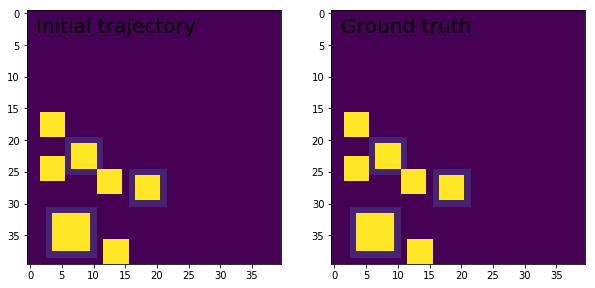

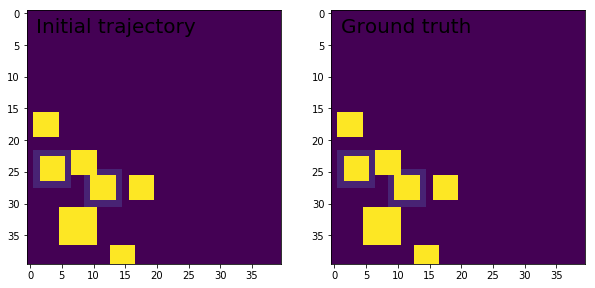

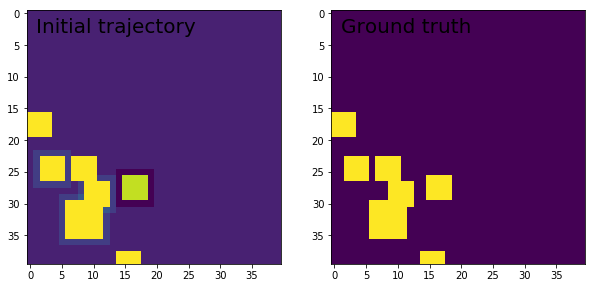

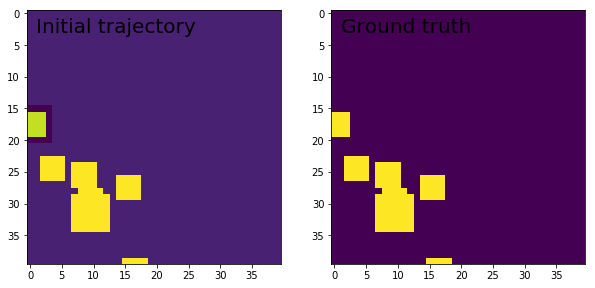

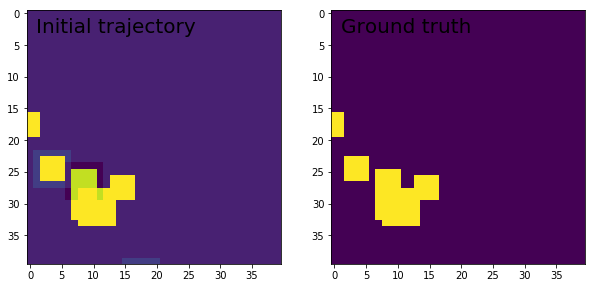

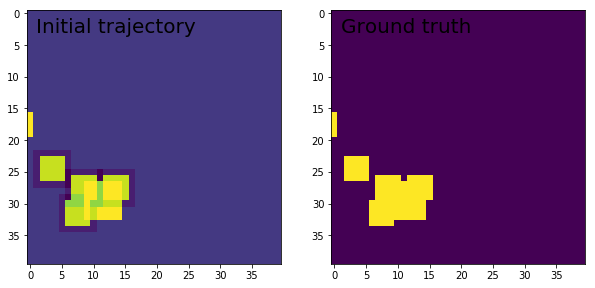

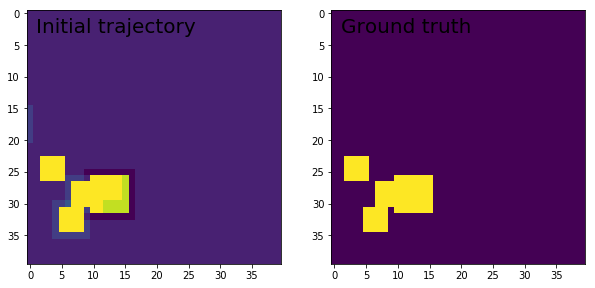

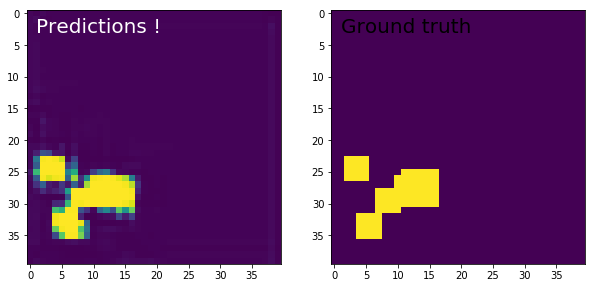

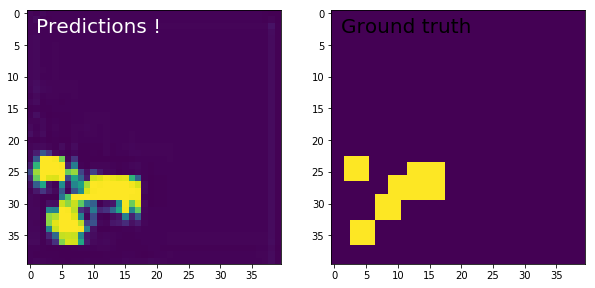

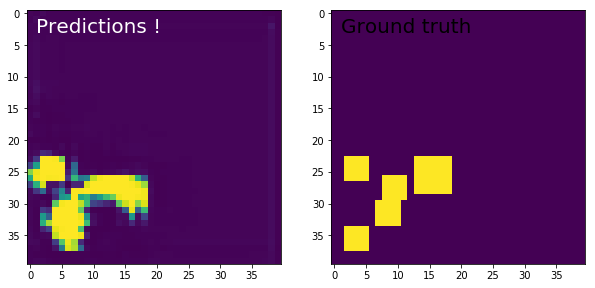

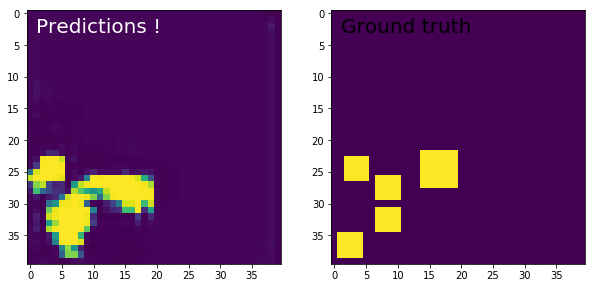

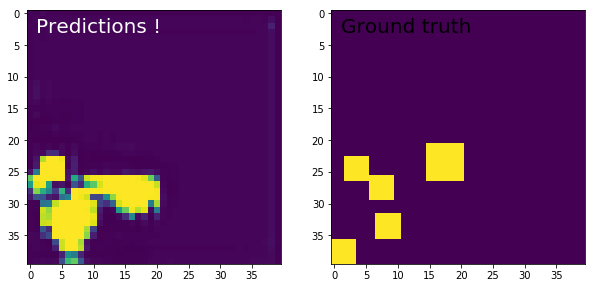

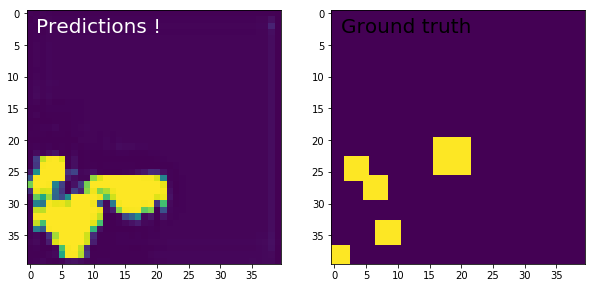

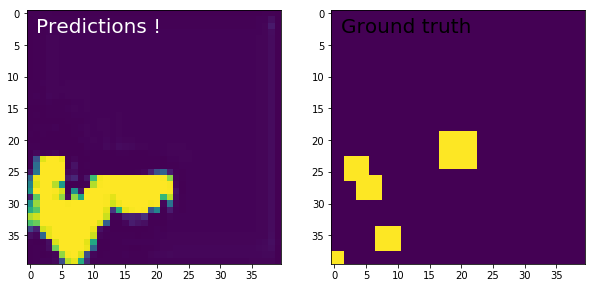

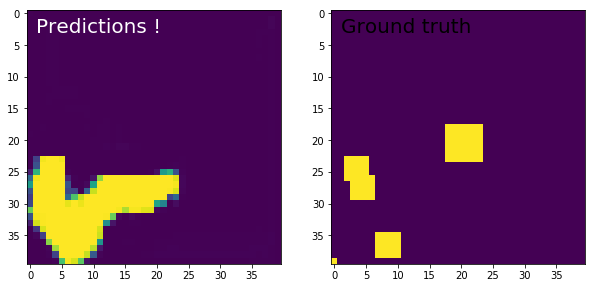

In [5]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
#        epochs=300, validation_split=0.05)
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## SimpleRNN（データセット：IMDB）

In [6]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.6865 - acc: 0.5427 - val_loss: 0.6654 - val_acc: 0.5886
Epoch 2/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.6062 - acc: 0.6646 - val_loss: 0.6025 - val_acc: 0.6646
Epoch 3/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.5038 - acc: 0.7547 - val_loss: 0.5749 - val_acc: 0.7111
Epoch 4/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4424 - acc: 0.7880 - val_loss: 0.6129 - val_acc: 0.6604
Epoch 5/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.4291 - acc: 0.8025 - val_loss: 0.5560 - val_acc: 0.7359
Epoch 6/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4161 - acc: 0.808

## GRU（データセット：IMDB）

In [7]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 118s 5ms/step - loss: 0.4723 - acc: 0.7721 - val_loss: 0.3865 - val_acc: 0.8272
Epoch 2/10
25000/25000 [==============================] - 114s 5ms/step - loss: 0.2875 - acc: 0.8846 - val_loss: 0.3619 - val_acc: 0.8426
Epoch 3/10
25000/25000 [==============================] - 115s 5ms/step - loss: 0.1803 - acc: 0.9325 - val_loss: 0.4223 - val_acc: 0.8374
Epoch 4/10
25000/25000 [==============================] - 114s 5ms/step - loss: 0.1077 - acc: 0.9611 - val_loss: 0.5389 - val_acc: 0.8230
Epoch 5/10
25000/25000 [==============================] - 115s 5ms/step - loss: 0.0670 - acc: 0.9762 - val_loss: 0.7067 - val_acc: 0.8170
Epoch 6/10
25000/25000 [==============================] - 112s 4ms/step - loss: 0.0410 - acc:

## SimpleRNNCell（データセット：IMDB）

In [18]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(SimpleRNNCell(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.6793 - acc: 0.5518 - val_loss: 0.6389 - val_acc: 0.6050
Epoch 2/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.5597 - acc: 0.7090 - val_loss: 0.5523 - val_acc: 0.7129
Epoch 3/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4671 - acc: 0.7831 - val_loss: 0.4777 - val_acc: 0.7842
Epoch 4/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4137 - acc: 0.8166 - val_loss: 0.5304 - val_acc: 0.7514
Epoch 5/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.3661 - acc: 0.8478 - val_loss: 0.5297 - val_acc: 0.7638
Epoch 6/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.3532 - acc: 0.852

## SimpleRNNCell（データセット：ロイター）

In [20]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(SimpleRNNCell(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 13s 1ms/step - loss: 2.6445 - acc: 0.3218 - val_loss: 2.4580 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.4320 - acc: 0.3517 - val_loss: 2.4306 - val_acc: 0.3620
Epoch 3/10
8982/8982 [==============================] - 11s 1ms/step - loss: 2.4302 - acc: 0.3517 - val_loss: 2.4394 - val_acc: 0.3620
Epoch 4/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.4244 - acc: 0.3517 - val_loss: 2.4418 - val_acc: 0.3620
Epoch 5/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.3746 - acc: 0.3537 - val_loss: 2.3214 - val_acc: 0.3785
Epoch 6/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.1832 - acc: 0.4053 - val_loss: 2.28

## CuDNNGRU（データセット：IMDB）

In [10]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.layers import GRUCell
from keras.layers import CuDNNGRU
from keras.layers import CuDNNLSTM
from keras.layers import StackedRNNCells
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNGRU(128))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 20s 795us/step - loss: 0.4210 - acc: 0.7992 - val_loss: 0.3436 - val_acc: 0.8478
Epoch 2/10
25000/25000 [==============================] - 17s 696us/step - loss: 0.2289 - acc: 0.9090 - val_loss: 0.3763 - val_acc: 0.8298
Epoch 3/10
25000/25000 [==============================] - 17s 698us/step - loss: 0.1208 - acc: 0.9559 - val_loss: 0.4861 - val_acc: 0.8285
Epoch 4/10
25000/25000 [==============================] - 17s 697us/step - loss: 0.0585 - acc: 0.9801 - val_loss: 0.5551 - val_acc: 0.8286
Epoch 5/10
25000/25000 [==============================] - 17s 699us/step - loss: 0.0316 - acc: 0.9898 - val_loss: 0.7543 - val_acc: 0.8211
Epoch 6/10
25000/25000 [==============================] - 17s 695us/step - loss: 0.0210 

## CuDNNLSTM（データセット：IMDB）

In [25]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.layers import GRUCell
from keras.layers import CuDNNGRU
from keras.layers import CuDNNLSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNLSTM(128))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 19s 774us/step - loss: 0.4362 - acc: 0.7953 - val_loss: 0.3918 - val_acc: 0.8292
Epoch 2/10
25000/25000 [==============================] - 17s 685us/step - loss: 0.2574 - acc: 0.8971 - val_loss: 0.3704 - val_acc: 0.8396
Epoch 3/10
25000/25000 [==============================] - 17s 687us/step - loss: 0.1610 - acc: 0.9386 - val_loss: 0.4191 - val_acc: 0.8202
Epoch 4/10
25000/25000 [==============================] - 17s 687us/step - loss: 0.1002 - acc: 0.9627 - val_loss: 0.5763 - val_acc: 0.8218
Epoch 5/10
25000/25000 [==============================] - 17s 690us/step - loss: 0.0710 - acc: 0.9745 - val_loss: 0.6339 - val_acc: 0.8246
Epoch 6/10
25000/25000 [==============================] - 17s 688us/step - loss: 0.0512 

## StackedRNNCells（データセット：IMDB）

In [14]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import LSTMCell
from keras.layers import RNN
from keras.layers import StackedRNNCells
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
cells = [LSTMCell(128, dropout=0.2, recurrent_dropout=0.2),LSTMCell(128, dropout=0.3, recurrent_dropout=0.3)]
model.add(RNN(StackedRNNCells(cells)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 235s 9ms/step - loss: 0.4558 - acc: 0.7854 - val_loss: 0.3802 - val_acc: 0.8360
Epoch 2/10
25000/25000 [==============================] - 231s 9ms/step - loss: 0.2942 - acc: 0.8819 - val_loss: 0.3783 - val_acc: 0.8358
Epoch 3/10
25000/25000 [==============================] - 231s 9ms/step - loss: 0.2129 - acc: 0.9209 - val_loss: 0.4349 - val_acc: 0.8296
Epoch 4/10
25000/25000 [==============================] - 231s 9ms/step - loss: 0.1564 - acc: 0.9432 - val_loss: 0.4747 - val_acc: 0.8248
Epoch 5/10
25000/25000 [==============================] - 231s 9ms/step - loss: 0.1129 - acc: 0.9601 - val_loss: 0.6200 - val_acc: 0.8098
Epoch 6/10
25000/25000 [==============================] - 231s 9ms/step - loss: 0.0853 - acc:

## StackedRNNCells（データセット：ロイター）

In [17]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import LSTMCell
from keras.layers import RNN
from keras.layers import StackedRNNCells
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
cells = [LSTMCell(128, dropout=0.2, recurrent_dropout=0.2),LSTMCell(128, dropout=0.3, recurrent_dropout=0.3)]
model.add(RNN(StackedRNNCells(cells)))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 73s 8ms/step - loss: 2.5442 - acc: 0.3501 - val_loss: 2.4303 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 69s 8ms/step - loss: 2.4228 - acc: 0.3517 - val_loss: 2.4366 - val_acc: 0.3620
Epoch 3/10
8982/8982 [==============================] - 69s 8ms/step - loss: 2.4223 - acc: 0.3517 - val_loss: 2.4321 - val_acc: 0.3620
Epoch 4/10
8982/8982 [==============================] - 70s 8ms/step - loss: 2.4211 - acc: 0.3517 - val_loss: 2.4269 - val_acc: 0.3620
Epoch 5/10
8982/8982 [==============================] - 69s 8ms/step - loss: 2.4182 - acc: 0.3517 - val_loss: 2.4274 - val_acc: 0.3620
Epoch 6/10
8982/8982 [==============================] - 69s 8ms/step - loss: 2.4215 - acc: 0.3529 - val_loss: 2.39

## LSTMCell（データセット：IMDB）

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import RNN
from keras.layers import LSTMCell
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(LSTMCell(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 381s 15ms/step - loss: 0.4601 - acc: 0.7812 - val_loss: 0.3866 - val_acc: 0.8314
Epoch 2/10
25000/25000 [==============================] - 304s 12ms/step - loss: 0.3036 - acc: 0.8753 - val_loss: 0.3764 - val_acc: 0.8331
Epoch 3/10
25000/25000 [==============================] - 304s 12ms/step - loss: 0.2182 - acc: 0.9145 - val_loss: 0.4313 - val_acc: 0.8204
Epoch 4/10
25000/25000 [==============================] - 295s 12ms/step - loss: 0.1539 - acc: 0.9429 - val_loss: 0.4566 - val_acc: 0.8225
Epoch 5/10
25000/25000 [==============================] - 268s 11ms/step - loss: 0.1089 - acc: 0.9616 - val_loss: 0.6081 - val_acc: 0.8234
Epoch 6/10
25000/25000 

## LSTMCell（データセット：ロイター）

In [9]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import RNN
from keras.layers import LSTMCell
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(LSTMCell(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 40s 4ms/step - loss: 2.5578 - acc: 0.3486 - val_loss: 2.4508 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 38s 4ms/step - loss: 2.4246 - acc: 0.3517 - val_loss: 2.4343 - val_acc: 0.3620
Epoch 3/10
8982/8982 [==============================] - 38s 4ms/step - loss: 2.4214 - acc: 0.3517 - val_loss: 2.4280 - val_acc: 0.3620
Epoch 4/10
8982/8982 [==============================] - 39s 4ms/step - loss: 2.4036 - acc: 0.3517 - val_loss: 2.3655 - val_acc: 0.3620
Epoch 5/10
8982/8982 [==============================] - 38s 4ms/step - loss: 2.1726 - acc: 0.3852 - val_loss: 1.8763 - val_acc: 0.5405
Epoch 6/10
8982/8982 [==============================] - 38s 4ms/step - loss: 1.6781 - acc: 0.5816 - val_loss: 1.65

## GRUCell（データセット：IMDB）

In [6]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.layers import GRUCell
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(GRUCell(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 105s 4ms/step - loss: 0.4709 - acc: 0.7726 - val_loss: 0.3904 - val_acc: 0.8248
Epoch 2/10
25000/25000 [==============================] - 103s 4ms/step - loss: 0.2859 - acc: 0.8846 - val_loss: 0.3550 - val_acc: 0.8463
Epoch 3/10
25000/25000 [==============================] - 104s 4ms/step - loss: 0.1767 - acc: 0.9346 - val_loss: 0.4494 - val_acc: 0.8324
Epoch 4/10
25000/25000 [==============================] - 103s 4ms/step - loss: 0.1069 - acc: 0.9629 - val_loss: 0.5299 - val_acc: 0.8148
Epoch 5/10
25000/25000 [==============================] - 103s 4ms/step - loss: 0.0665 - acc: 0.9765 - val_loss: 0.6828 - val_acc: 0.8181
Epoch 6/10
25000/25000 [====

## GRUCell（データセット：ロイター）

In [8]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import GRU
from keras.layers import GRUCell
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(GRUCell(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 33s 4ms/step - loss: 2.5641 - acc: 0.3495 - val_loss: 2.4488 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 31s 3ms/step - loss: 2.3474 - acc: 0.3558 - val_loss: 2.2436 - val_acc: 0.3829
Epoch 3/10
8982/8982 [==============================] - 31s 3ms/step - loss: 2.0078 - acc: 0.4332 - val_loss: 1.8770 - val_acc: 0.5053
Epoch 4/10
8982/8982 [==============================] - 31s 3ms/step - loss: 1.8145 - acc: 0.5099 - val_loss: 1.8115 - val_acc: 0.5249
Epoch 5/10
8982/8982 [==============================] - 31s 3ms/step - loss: 1.7116 - acc: 0.5452 - val_loss: 1.7777 - val_acc: 0.5450
Epoch 6/10
8982/8982 [==============================] - 31s 3ms/step - loss: 1.7280 - acc: 0.5390 - val_loss: 1.99

## SimpleRNN（データセット：ロイター）

In [5]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.layers import GRUCell
from keras.layers import CuDNNGRU
from keras.layers import CuDNNLSTM
from keras.layers import StackedRNNCells
from keras.layers import LSTMCell
from keras.layers import GRUCell
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 11s 1ms/step - loss: 2.6446 - acc: 0.3218 - val_loss: 2.4581 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.4320 - acc: 0.3517 - val_loss: 2.4306 - val_acc: 0.3620
Epoch 3/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.4302 - acc: 0.3517 - val_loss: 2.4394 - val_acc: 0.3620
Epoch 4/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.4243 - acc: 0.3517 - val_loss: 2.4417 - val_acc: 0.3620
Epoch 5/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.3879 - acc: 0.3515 - val_loss: 2.3352 - val_acc: 0.3793
Epoch 6/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.2354 - acc: 0.3930 - val_loss: 2.34

## GRU（データセット：ロイター）

In [4]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 32s 4ms/step - loss: 2.5641 - acc: 0.3495 - val_loss: 2.4484 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 31s 3ms/step - loss: 2.3602 - acc: 0.3556 - val_loss: 2.2372 - val_acc: 0.3651
Epoch 3/10
8982/8982 [==============================] - 31s 3ms/step - loss: 1.9681 - acc: 0.4760 - val_loss: 1.7948 - val_acc: 0.5548
Epoch 4/10
8982/8982 [==============================] - 31s 3ms/step - loss: 1.6513 - acc: 0.5867 - val_loss: 1.7266 - val_acc: 0.5717
Epoch 5/10
8982/8982 [==============================] - 32s 4ms/step - loss: 1.4914 - acc: 0.6263 - val_loss: 1.6521 - val_acc: 0.5931
Epoch 6/10
8982/8982 [==============================] - 31s 3ms/step - loss: 1.4158 - acc: 0.6482 - val_loss: 1.61

## LSTM（データセット：ロイター）

In [3]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 40s 4ms/step - loss: 2.5578 - acc: 0.3486 - val_loss: 2.4508 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 39s 4ms/step - loss: 2.4246 - acc: 0.3517 - val_loss: 2.4342 - val_acc: 0.3620
Epoch 3/10
8982/8982 [==============================] - 39s 4ms/step - loss: 2.4216 - acc: 0.3517 - val_loss: 2.4283 - val_acc: 0.3620
Epoch 4/10
8982/8982 [==============================] - 39s 4ms/step - loss: 2.4004 - acc: 0.3517 - val_loss: 2.3561 - val_acc: 0.3620
Epoch 5/10
8982/8982 [==============================] - 39s 4ms/step - loss: 2.1497 - acc: 0.4296 - val_loss: 1.8430 - val_acc: 0.5450
Epoch 6/10
8982/8982 [==============================] - 38s 4ms/step - loss: 1.6679 - acc: 0.5919 - val_loss: 1.66

## CuDNNLSTM（データセット：ロイター）

In [47]:
# 他クラス分類対応
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.layers import GRUCell
from keras.layers import CuDNNGRU
from keras.layers import CuDNNLSTM
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
# 他クラス分類対応
y_train = np_utils.to_categorical(y_train)
# 他クラス分類対応
y_test = np_utils.to_categorical(y_test)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNLSTM(128))
# 他クラス分類対応
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
# 他クラス分類対応
model.compile(loss='categorical_crossentropy',
#model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 9s 1ms/step - loss: 2.5519 - acc: 0.3515 - val_loss: 2.4473 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 6s 615us/step - loss: 2.4303 - acc: 0.3517 - val_loss: 2.4327 - val_acc: 0.3620
Epoch 3/10
8982/8982 [==============================] - 6s 613us/step - loss: 2.4232 - acc: 0.3517 - val_loss: 2.4263 - val_acc: 0.3620
Epoch 4/10
8982/8982 [==============================] - 6s 614us/step - loss: 2.4207 - acc: 0.3517 - val_loss: 2.4207 - val_acc: 0.3620
Epoch 5/10
8982/8982 [==============================] - 6s 615us/step - loss: 2.4183 - acc: 0.3517 - val_loss: 2.4323 - val_acc: 0.3620
Epoch 6/10
8982/8982 [==============================] - 6s 615us/step - loss: 2.4375 - acc: 0.3504 - val_loss: 

## CuDNNGRU（データセット：ロイター）

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import CuDNNGRU
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
# 他クラス分類対応
y_train = np_utils.to_categorical(y_train)
# 他クラス分類対応
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNGRU(128))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.


Loading data...
2113536/2110848 [==============================] - 0s 0us/step
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 55s 6ms/step - loss: 2.5501 - acc: 0.2161 - val_loss: 2.4057 - val_acc: 0.2110
Epoch 2/10
8982/8982 [==============================] - 5s 550us/step - loss: 2.1928 - acc: 0.3389 - val_loss: 2.0574 - val_acc: 0.3709
Epoch 3/10
8982/8982 [==============================] - 5s 544us/step - loss: 1.9151 - acc: 0.3942 - val_loss: 1.7492 - val_acc: 0.5205
Epoch 4/10
8982/8982 [==============================] - 5s 543us/step - loss: 1.4536 - acc: 0.6247 - val_loss: 1.4469 - val_acc: 0.6398
Epoch 5/10
8982/8982 [==============================] - 5s 542us/step - loss: 1.1058 - acc: 0.7236 - val_loss: 1.3356 - val_acc: 0.6710
Epoch 6/10
8982/8982 [=========================

## RNN（データセット：ロイター）

In [2]:
# First, let's define a RNN Cell, as a layer subclass.
import keras
from keras import backend as K

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

# cell = MinimalRNNCell(32)
# x = keras.Input((None, 5))
# layer = RNN(cell)
# y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [MinimalRNNCell(32), MinimalRNNCell(64)]
#x = keras.Input((None, 5))

from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import SimpleRNNCell
from keras.layers import GRUCell
from keras.layers import CuDNNGRU
from keras.layers import CuDNNLSTM
from keras.layers import StackedRNNCells
from keras.layers import LSTMCell
from keras.layers import GRUCell
from keras.layers import RNN
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils import np_utils

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(cells))
model.add(Dense(46, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 11s 1ms/step - loss: 2.5577 - acc: 0.3552 - val_loss: 2.3049 - val_acc: 0.3811
Epoch 2/10
8982/8982 [==============================] - 11s 1ms/step - loss: 2.1932 - acc: 0.3633 - val_loss: 2.2215 - val_acc: 0.3771
Epoch 3/10
8982/8982 [==============================] - 11s 1ms/step - loss: 2.0454 - acc: 0.3407 - val_loss: 2.3848 - val_acc: 0.3767
Epoch 4/10
8982/8982 [==============================] - 11s 1ms/step - loss: 1.9065 - acc: 0.3486 - val_loss: 2.3812 - val_acc: 0.3655
Epoch 5/10
8982/8982 [==============================] - 11s 1ms/step - loss: 1.7380 - acc: 0.3967 - val_loss: 2.4102 - val_acc: 0.3704
Epoch 6/10
8982/8982 [==============================] - 11s 1ms/step - loss: 1.5629 - acc: 0.4159 - val_loss: 2.25